In [ ]:
pip install geostatspy

     |████████████████████████████████| 61kB 1.3MB/s 


In [ ]:
import Gassrhosat
import Gassvpsat
import Gassvssat

In [ ]:
from Gassrhosat import gassmannrho
from Gassvpsat import gassmannvp
from Gassvssat import gassmannvs

In [ ]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import random

In [ ]:
Vp_mean = 21000; Vp_stdev = 5000          # Gaussian mean and standard deviation Vp
Vs_mean = 12600; Vs_stdev = 3000          # Gaussian mean and standard deviation Vs
rho_mean = 5.51 ; rho_stdev = 1.5          # Gaussian mean and standard deviation rho
L = 10000                                 # Number of MCS realizations


In [ ]:
Vp_min = 0; Vp_max = 40000           
Vs_min = 0; Vs_max = 25000
rho_min = 0.5; rho_max = 8           

In [ ]:
Vp = np.random.normal(Vp_mean, Vp_stdev, size=L) 
Vs = np.random.normal(Vs_mean, Vs_stdev, size=L)   
rho = np.random.normal(rho_mean, rho_stdev, size=L)         

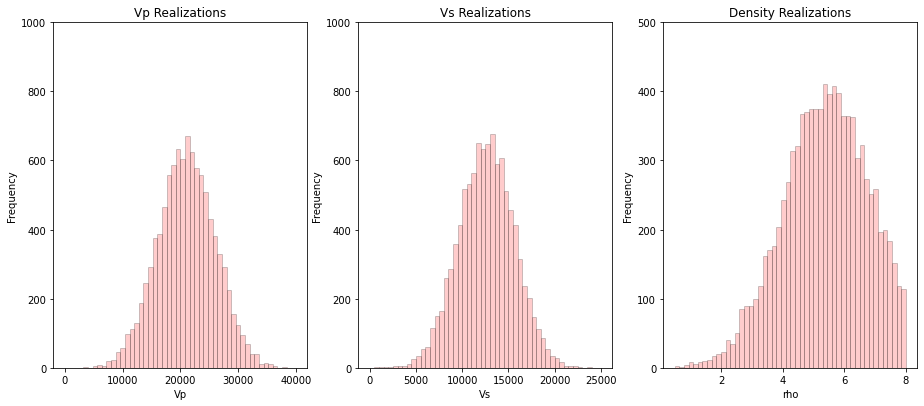

In [ ]:
plt.subplot(131)
GSLIB.hist_st(Vp,Vp_min,Vp_max,log=False,cumul=False,bins=50,weights=None,xlabel="Vp",title="Vp Realizations")
plt.ylim(0.0,1000)

plt.subplot(132)
GSLIB.hist_st(Vs,Vs_min,Vs_max,log=False,cumul=False,bins=50,weights=None,xlabel="Vs",title="Vs Realizations")
plt.ylim(0.0,1000)

plt.subplot(133)
GSLIB.hist_st(rho,rho_min,rho_max,log=False,cumul=False,bins=50,weights=None,xlabel="rho",title="Density Realizations")
plt.ylim(0.0,500)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()


In [ ]:
Pwave=np.zeros(10000)
for i in range(10000):
  Pwave[i] = gassmannvp(Vp[i],Vs[i],rho[i])

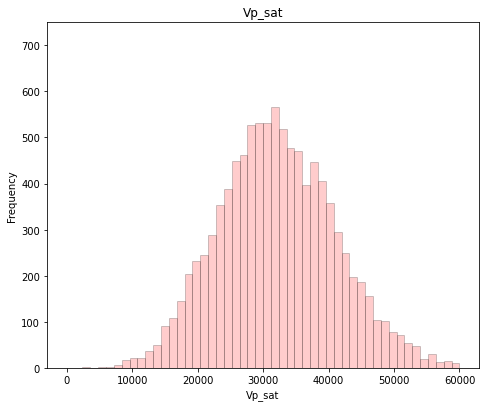

In [ ]:
plt.subplot(111)
GSLIB.hist_st(Pwave,Vp_min,60000,log=False,cumul=False,bins=50,weights=None,xlabel="Vp_sat",title="Vp_sat")
plt.ylim(0.0,750)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
Swave=np.zeros(10000)
for i in range(10000):
  Swave[i] = gassmannvs(Vp[i],Vs[i],rho[i])

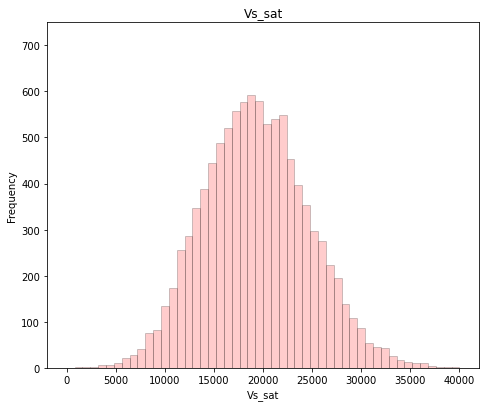

In [ ]:
plt.subplot(111)
GSLIB.hist_st(Swave,Vs_min,40000,log=False,cumul=False,bins=50,weights=None,xlabel="Vs_sat",title="Vs_sat")
plt.ylim(0.0,750)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
Density=np.zeros(10000)
for i in range(10000):
  Density[i] = gassmannrho(Vp[i],Vs[i],rho[i])

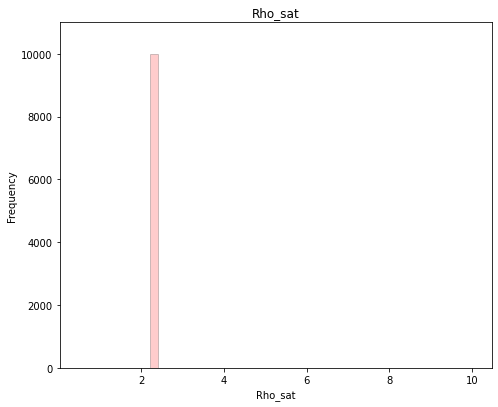

In [ ]:
plt.subplot(111)
GSLIB.hist_st(Density,rho_min,10,log=False,cumul=False,bins=50,weights=None,xlabel="Rho_sat",title="Rho_sat")
plt.ylim(0.0,11000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()